![](../../images/header.png)

# Cosmological inference

Author: Simon Bouchard

Last Updated: May 7, 2025

> Note : Notebooks links are placeholders and will be updated when the notebooks are available.

In this notebook, we will explore the Monte-Carlo method, a powerful statistical technique used for numerical integration and simulation. The Monte-Carlo method relies on random sampling to obtain numerical results, making it particularly useful for problems that are difficult or impossible to solve analytically.

By the end of this notebook, you should be able to:
- Understand the basic underlying principles of Monte-Carlo methods
- Implement a basic Monte-Carlo code to estimate the value of pi
- Understand what is a Monte-Carlo chain and how to visualize it as a contour plot
- Understand the basics of a cosmological inference and how we use Monte-Carlo methods to estimate the values of cosmological parameters

## Preferred Backgrounds
While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:

- How Jupyter cells work
- Basic understanding of [conditional probabilities](https://en.wikipedia.org/wiki/Conditional_probability)


In [1]:
# Run this cell to load the basic Python packages we need to run this notebook
import numpy as np
import matplotlib.pyplot as plt

# FIXME : Add desihigh module (in the meantime, the last cell of this notebook contains all the functions)
from desihigh.inference import *

## 1 - Throwing stuff with a blindfold on (don't try this at home!)

The [DESI Data Release 2 (or DR2) BAO analysis](http://arxiv.org/abs/2503.14738) (see the [BAO notebook](bao.ipynb)), published in March 2025 contain several interesting results on the value of the Dark Energy equation of state parameters $w_0$ and $w_a$ (see the [cosmological parameters notebook](cosmological_parameters.ipynb)).
Those results are presented in the form of a 2D *contour plot* that looks like this :

<img src="../../images/desi_chains_contour_w0wa.png" alt="DESI DR2 dark energy contour plot" width="600"/>

But what does this represent ? What does it mean ? And the most important question : How did we get there ?

### 1.1 - Monte-Carlo 101

To understand this plot, let's go back to the basics of *Monte-Carlo* methods. The idea is to use random sampling to estimate a quantity of interest.

Let's say we want to estimate the value of $\pi$. 
We know that the formula of the area of a circle is $A_c = \pi r^2$. If we take a circle of radius $r=1$, the area is now $A_c = \pi$. 

> *Note* : The same way, the area of a square is $A_s = l^2$. If we take a square of side $l=1$, the area is now $A_s = 1$. This will be useful later.


**Let's plot the circle:** 
The equation of a circle is $x^2 + y^2 = r^2$. You can select the $x$ values with `np.linspace(..., ..., 100)` and then calculate the corresponding y values with `np.sqrt`. You can use the `plt.plot(x, y)` function to plot the circle.

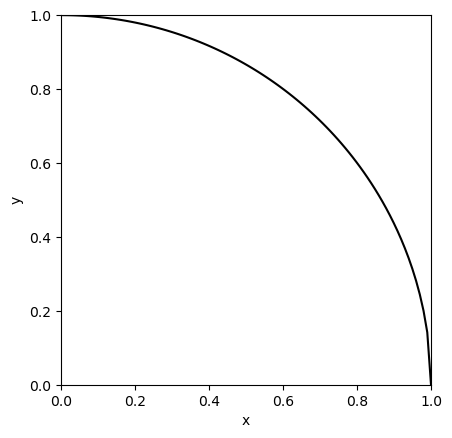

In [2]:
# x_c = np.linspace(... , ... , 100) # Select 100 points between 0 and 1
# y_c = np.sqrt(...)
# plt.plot(... , color='black')

# FIXME: soln to be removed
x_c = np.linspace(0, 1, 100) # Select 100 points between 0 and 1
y_c = np.sqrt(1-x_c**2)
plt.plot(x_c, y_c, color='black')

# Make the figure pretty
ax = plt.gca() # Get the current axes
ax.set_aspect('equal') # Set the aspect ratio to be equal to make a square
ax.set_xlim(0, 1) # Set the x-axis limits
ax.set_ylim(0, 1) # Set the y-axis limits
ax.set_xlabel('x') # Set the x-axis label
ax.set_ylabel('y'); # Set the y-axis label

We now have the quarter of a circle of radius $r=1$ within a square of side $l=1$. The area of the quarter circle is $A_c = \frac{\pi}{4}$. The area of the square is $A_s = 1$.

**Now, let's choose a random point in the square.** 

We can use the `np.random.rand()` function to generate random numbers between 0 and 1. To select a point in 2 dimensions, you will need to choose two random values : the first number will be the x-coordinate and the second number will be the y-coordinate of the point.

Is the point inside the circle ? You can visualize the point with `plt.scatter(x, y)` where `x` and `y` are the coordinates of the point. (You will also need to add the circle the plot, be careful to not overwrite the x and y variables you just created !).

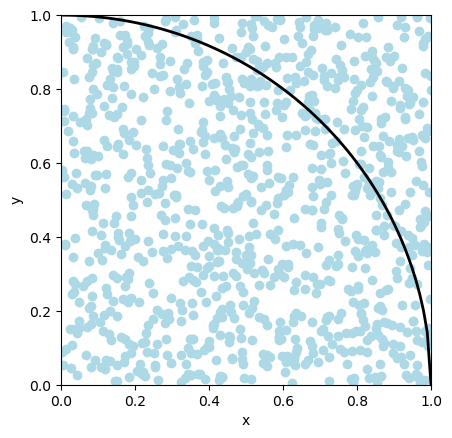

In [3]:
# x = ...
# y = ...
# plt.scatter(... , color='lightblue')

# FIXME : soln to be removed
x = np.random.rand(1000)
y = np.random.rand(1000)

plt.scatter(x, y, color='lightblue')

# TODO : add the circle back here ! 
# plt.plot(... , color='black')

# FIXME : soln to be removed
plt.plot(x_c, y_c, color='black', lw=2)

# Make the figure pretty
ax = plt.gca() # Get the current axes
ax.set_aspect('equal') # Set the aspect ratio to be equal to make a square
ax.set_xlim(0, 1) # Set the x-axis limits
ax.set_ylim(0, 1) # Set the y-axis limits
ax.set_xlabel('x') # Set the x-axis label
ax.set_ylabel('y'); # Set the y-axis label

One point is not enough to estimate the value of $\pi$. We need to repeat this process several times. Modify the previous cell to select 1000 random points in the square.

> Tip : The `np.random.rand()` function can take an integer as an argument to generate several random numbers at once. 
> Also, passing two arrays to the `plt.scatter(x, y)` function will plot the combination of each index of the `x` and `y` arrays.

We're almost there ! Now, we need to count how many points are inside the circle and how many points are outside the circle.
To do this, we can use the equation of the circle. If $x^2 + y^2 < r^2$, then the point is inside the circle. Otherwise, it is outside the circle.

To count the number of points inside the circle, we can use a *boolean mask* : it's an array where each element is `True` if a logical condition is met and `False` otherwise.

**Count the number of points in the circle using the equation of the circle.** You can use the `np.sum()` function to count the number of `True` values in the boolean mask.

In [4]:
# mask = ... # Check if the point is inside the circle
# count_inside = ... # Count the number of points inside the circle

# FIXME : soln to be removed
mask = (x**2 + y**2) < 1 # Check if the point is inside the circle
count_inside = np.sum(mask) # Count the number of points inside the circle

print(f"Number of points inside the circle: {count_inside}")

Number of points inside the circle: 772


**Visualize the result by plotting the points inside the circle in blue and the points outside the circle in red.**

You can use the `plt.scatter(x, y, c=mask)` function to plot the points with different colors. The `c` argument  will color the points in different colors depending on the mask value. You can also use the `cmap` argument to specify the color map. For example, `cmap='coolwarm_r'` will use a blue-red color map.

> *For fun :* Try it with different colormaps ! You can try `viridis`, `spring`, and many more !

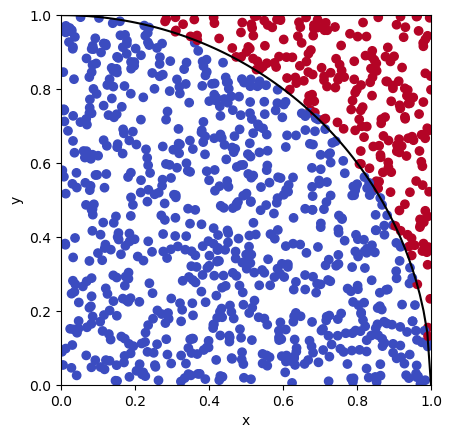

In [5]:
# plt.scatter(...) # Color points based on mask

# FIXME : soln to be removed
plt.scatter(x, y, c=mask, cmap='coolwarm_r') # Color points based on mask

# add the circle back here !
plt.plot(x_c, y_c, color='black')

# Make the figure pretty
ax = plt.gca() # Get the current axes
ax.set_aspect('equal') # Set the aspect ratio to be equal to make a square
ax.set_xlim(0, 1) # Set the x-axis limits
ax.set_ylim(0, 1) # Set the y-axis limits
ax.set_xlabel('x') # Set the x-axis label
ax.set_ylabel('y'); # Set the y-axis label

Now that we know how to count the number of points inside the circle, we can estimate the value of $\pi$ !

We can use the ratio of the area of the circle to the area of the square to estimate the value of $\pi$. The area of the circle is $A_c = \frac{\pi}{4}$ and the area of the square is $A_s = 1$. Therefore, we can estimate $\pi$ by rearranging the equation to get :

$$\pi = 4 \times \frac{A_c}{A_s}$$

But we still need to esimate our areas ! Luckily, the ratio of the areas is basically the same as the ratio of the number of points inside the circle to the total number of points. So we can write :
$$\pi \approx 4 \times \frac{N_c}{N_t}$$

Where $N_c$ is the number of points inside the circle and $N_t$ is the total number of points.

This is called the *[Monte-Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method)*: The probability of a point being inside the circle is proportional to the ratio of the areas !

**Estimate the value of $\pi$ using the formula above.** 

In [6]:
# N_circle = ... # Number of points inside the circle
# N_total = ... # Total number of points
# pi_estimate = ... # Estimate of pi

# FIXME : soln to be removed
N_circle = count_inside # Number of points inside the circle
N_total = len(x) # Total number of points
pi_estimate = 4 * N_circle / N_total # Estimate of pi

print(f"Estimated value of pi: {pi_estimate:.4f}")

Estimated value of pi: 3.0880


How close is it to the real value of $\pi$ ? You can use the `np.abs()` function to calculate the absolute difference between your estimate and the real value of $\pi$ (that you can get with `np.pi`).

In [7]:
# print(np.abs(...))

# FIXME : soln to be removed
print(np.abs(np.pi - pi_estimate))

0.05359265358979304


The precision of this estimate depends on the number of points you selected. The more points you select, the more precise your estimate will be. You can try with different numbers of points to see how it affects the precision of your estimate.

Of course, the value of $\pi$ is not the only thing we can estimate with Monte-Carlo methods. We can also estimate the value of an integral, the value of a function, etc. The idea is always the same: use random sampling to estimate a quantity of interest. 


### 1.2 - Gaussians, Gaussians everywhere !!!

Now that we know how to estimate the value of $\pi$, let's see how we can use Monte-Carlo methods to estimate the value of a function.

In this case, we will use the Gaussian function, which is defined as:
$$
    f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}

$$

This function is used in many fields, including statistics, physics, and machine learning. It is also the basis of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), which is used to model many real-world phenomena.

A known physical law is that any function can be approximated by a Gaussian function. This is called the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). This means that if we take a large number of random samples from a distribution, the distribution of the sample means will be approximately Gaussian, regardless of the original distribution.

Now, let's see how we can use Monte-Carlo methods to estimate the value of a Gaussian function.
We will use the following parameters for our Gaussian function:
- $\mu = 0$ (mean)
- $\sigma = 1$ (standard deviation)

In [8]:
def f(x, mu=0, sigma=1):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

**Choose 10 points** with `np.random.normal(mu, sigma, n)` and **plot the histogram of the points** with `plt.hist(x, bins=100, density=True)`.
Also, **plot the Gaussian function** using `plt.plot(x, f(x))` where `f(x)` is the Gaussian function defined above.

> *Note :* `plt.hist()` returns three values : the histogram, the `bins` and the patches. We will need to pass the `bins` to the gaussian function to plot the Gaussian curve ! Don't forget to catch the return values !

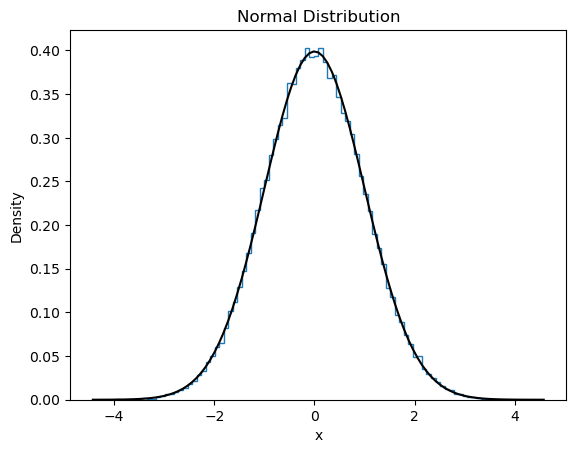

In [9]:
# n = ... # Number of random points
# mu = 0 # Mean of the normal distribution
# sigma = 1 # Standard deviation of the normal distribution
# x = np.random.normal(...) # Generate 1000 random numbers from a normal distribution with mu=0 and sigma=1

# count, bins, _ = plt.hist(... , histtype='step', bins=100, density=True)
# plt.plot(bins, f(...), color='black')

# FIXME : soln to be removed
n = 100000 # Number of random points
mu = 0 # Mean of the normal distribution
sigma = 1 # Standard deviation of the normal distribution
x = np.random.normal(mu, sigma, n) # Generate 1000 random numbers from a normal distribution with mu=0 and sigma=1

count, bins, _ = plt.hist(x, histtype='step', bins=100, density=True)
plt.plot(bins, f(bins, mu, sigma), color='black')

# Make the figure pretty
ax = plt.gca() # Get the current axes
ax.set_xlabel('x') # Set the x-axis label
ax.set_ylabel('Density') # Set the y-axis label
ax.set_title('Normal Distribution'); # Set the title of the plot

Does the histogram look like a Gaussian function ?
What happens if you change the number of points ?
Try with 100, 1000, 10000 and 100000 points. You can also try with different values of $\mu$ and $\sigma$.

<details>
  <summary>Spoiler warning</summary>
  
Here is an evolution of the histogram with the number of points :

<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Approximation_d%27une_distribution_normale.gif" alt="Histogram of Gaussian function" width="600"/>

<h6> Source : <a href="https://commons.wikimedia.org/wiki/File:Approximation_d%27une_distribution_normale.gif">Wikipedia</a></h6>

</details>

### 1.3 - Let's recap ! 

What do we know so far ? 
- We can use Monte-Carlo methods to estimate the value of a function by using random sampling.
- The more points we sample, the more precise our estimate will be.
- If we randomly sample enough points, the distribution of the sample means will be approximately Gaussian.

> *Note :* The Central Limit Theorem is a powerful result, but we hide a lot of details here for clarity 😉 That's not *always* true, some conditions have to be respected.

Let's try to apply this to an actual physical problem (be careful, maths ahead !)

## 2 - Cosmological inference
In cosmology, we try to estimate the values of the cosmological parameters that describe the universe model (see the [cosmological parameters notebook](cosmological_parameters.ipynb)).

But in physics, any measurement must come with an uncertainty estimate (usually called "error bars"). In classical areas of physics, this uncertainty is reduced by taking a lot of measurements. By the Central Limit Theorem, the distribution of the measurements will be approximately Gaussian, and we can use the standard deviation of the sample to estimate the uncertainty, while its mean will be the best estimate of the value of the parameter. This is called the *frequentist approach*.

In cosmology, we measure our information on the Universe itself, which means we only have one measurement (or "realization") of our observable. So, how do we estimate the uncertainty of our measurements ? Also, how do we estimate the best value of the parameter ?

### 2.1 - The Bayesian approach
Instead of using the frequentist approach, we can estimate the distribution of the parameters, by randomly sampling the parameter space and measuring how close our model with those random parameters ($\theta$) is to the actual measurement ($x$).

To measure how close our model is to the actual measurement, we use the *likelihood function* $L(\theta | x)$, which is defined as the probability of observing the data $x$ given the parameters $\theta$. The likelihood function is a measure of how well our model fits the data.

We also need to define a prior distribution $P(\theta)$, which is the probability of the parameters $\theta$ before we observe the data. The prior distribution describes our beliefs (or *prior* knowledge) about the parameters before we see the data.

Then, we can use **Bayes' theorem** to calculate the posterior distribution $P(\theta | x)$, which is the probability of the parameters $\theta$ being the true ones given the data $x$:
$$
P(\theta | x) = \frac{L(\theta | x) P(\theta)}{P(x)}
$$

Where $P(x)$ is the normalization factor, which is the probability of observing the data $x$ given all possible parameters $\theta$.
(This formula might look familiar to you if you know about conditional probabilities !)

### 2.2 - How to chain
This looks a lot like the Monte-Carlo method we used to estimate the value of $\pi$, but more complicated !

We are now using a multi-dimensional "parameter space" instead of a 2D space: the parameters are now a multi-dimensional vector $\theta$ instead of a two-dimensional vector $(x, y)$.
The $\pi$ estimator (the ratio of points and the mask over the circle) is now replaced by the likelihood function $L(\theta | x)$, and the area of the square is now replaced by the prior distribution $P(\theta)$.

Now (with a lot of stuff under the hood here), we actually use what is called a *Markov Chain Monte-Carlo* (or MCMC) algorithm to explore the parameter space. The result of this algorithm is a *chain* of points in the parameter space, stored at each *step* of the exploration, which we can use to estimate the posterior distribution $P(\theta | x)$.

> *Note :* Long story short, the MCMC algorithm uses methods to explores the parameter space in a way that the more points are close to the maximum of the likelihood function, the more likely they are to be selected. One of those methods is called the *Metropolis-Hastings* algorithm.

Let's take a look at what a DESI cosmological inference chain looks like.

> Note : at the moment, the data used is a mock chain sampled around DESI DR2 means (we will replace it eventually by actual DESI chains !)

Chain has nparams=8 lines and nsteps=224651 columns


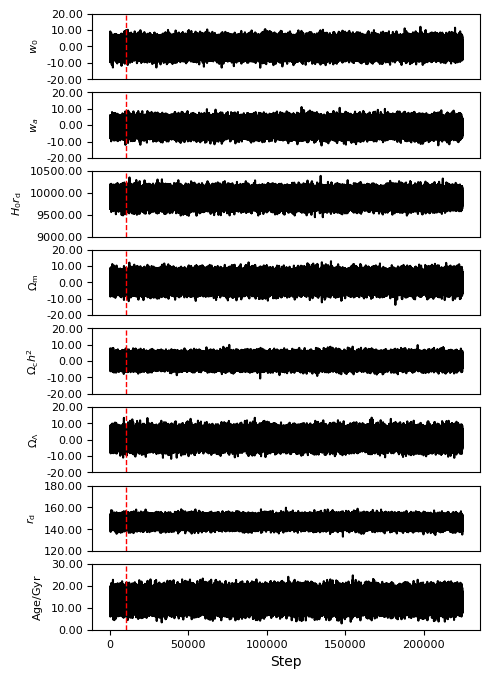

In [4]:
chain = np.load('../../data/desi_mock_chain.npy', allow_pickle=True).item()

nsteps = chain.samples.shape[0] # Number of steps
nparams = chain.samples.shape[1] # Number of parameters
print(f'Chain has {nparams=} lines and {nsteps=} columns')

fig, ax = plot_chain(chain) # Plot the chain

for i in range(nparams):
    ax[i].axvline(x=10000, color='red', lw=1, ls='--') # Add a vertical line at step 1000

The horizontal plots represent the values of the parameter that the MCMC algorithm has explored. 
A vertical cut trough the plot will give you the values of the $\theta$ vector at that point in time.

Now, since the algorithm explores the distribution of the parameter in the prior space, we can use the values of the chain to estimate the posterior distribution of the parameters.

Let's see what the histogram of the values looks like for the $\Omega_m$ parameter, expected at $\Omega_m = 0.3153 \pm 0.0072$ from the measurements of [Planck 2018](https://arxiv.org/abs/1807.06209).

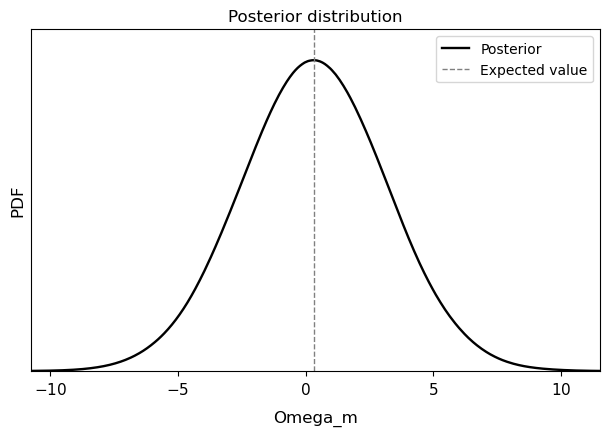

In [5]:
parameter_name = 'Omega_m'
expected_value = 0.3153

plot_histogram(
    chain, 
    name=parameter_name, 
    width_inch=5, 
    line_args={'label': 'Posterior'},
    title_limit=1, # To display the mean and std in the title, but you can't see it because I overwrite it :P
) # Plot the histogram of the parameter

# Make the figure pretty
ax = plt.gca()
ax.axvline(x=expected_value, color='gray', lw=1, ls='--', label='Expected value') # Add a vertical line at the expected value
ax.legend()
ax.set_xlabel(parameter_name, fontsize=12) # Set the x-axis label
ax.set_ylabel('PDF', fontsize=12) # Set the y-axis label
ax.set_title('Posterior distribution'); # Set the title of the plot

Does it look like a Gaussian function ?

**What is the mean and the standard deviation of the distribution ?** You can use the `np.mean()` and `np.std()` functions to calculate the mean and the standard deviation of the values of the chain. You can access the values of the chain with `chain['Omega_m']` like a dictionary.

In [6]:
# values = ...
# mu = ... # Mean of the values
# sigma = ... # Standard deviation of the values

# FIXME : soln to be removed
values = chain['Omega_m']
mu = np.mean(values) # Mean of the values
sigma = np.std(values) # Standard deviation of the values

print(f"Mean: {mu:.4f}, Standard Deviation: {sigma:.4f}")

Mean: 0.3279, Standard Deviation: 2.8601


Is the mean of the posterior distribution close to the expected value ?

To be allowed to accept 0.3153 as a result, we need to check if this value is within the 1-sigma confidence interval of the posterior distribution. This means that $\mu - \sigma < -1 < \mu + \sigma$.

Is the measurement of Planck 2018 within the 1-sigma confidence interval of the posterior distribution ?

> *Note :* The 1-sigma confidence interval is the range of values that contains 68% of the posterior distribution. This means that if we take a lot of samples from the posterior distribution, 68% of them will be within this range.
> For a Gaussian distribution, this is interval is $\pm \sigma$.

### 2.3 - Hiking comes in handy

Have you ever been hiking in the mountains ?
If you have, you probably already have encountered a "topographic map".
This is a map that shows the elevation of the terrain using lines connect points of equal elevation. They are called "Contour Lines". The closer they are, the steeper the terrain is.

<img src="../../images/topographic_map.jpg" alt="Topographic map example" width="600"/>

<h6> Source : <a href="https://www.rei.com/learn/expert-advice/topo-maps-how-to-use.html">Recreational Equipment, Inc</a></h6>

If we plot the distribution of two parameters, we now have three dimensions: the x-axis is the value of the first parameter, the y-axis is the value of the second parameter, and the z-axis is the value of the posterior distribution.
We could use a 3D plot to visualize the distribution, but it would be hard to read. Instead, we can use contour lines to represent the distribution. This is called a *contour plot*.

By convention, we only plot two contour lines for readability: the 1-sigma and the 2-sigma confidence intervals. The 1-sigma confidence interval is the range of values that contains 68% of the posterior distribution, and the 2-sigma confidence interval is the range of values that contains 95% of the posterior distribution.

This is what the contour plot for the $\Omega_m$ and $H_0 r_d$ parameters looks like for our chain : 

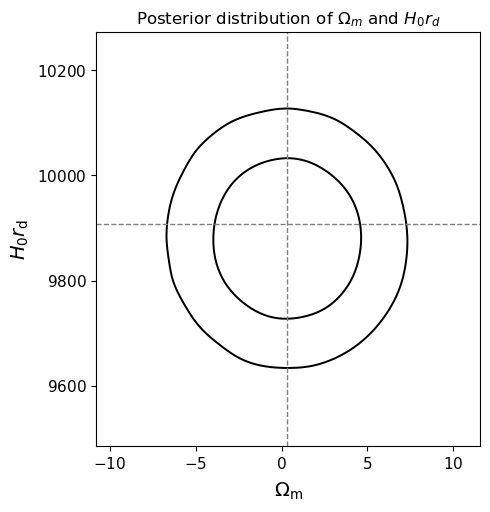

In [7]:
plot_contour(
    chain, 
    names=['Omega_m', 'H0_rd'], 
    width_inch=5, 
    ratio=1, # To make the plot square
) # Plot the contour of the parameters

Omega_m_Planck = 0.3153 # Planck value of Omega_m
H0_Planck = 67.36 # Planck value of H0
rd_Planck = 147.09 # Planck value of rd

# Make the figure pretty
ax = plt.gca()
ax.axhline(y=H0_Planck*rd_Planck, color='gray', lw=1, ls='--') # Add a horizontal line
ax.axvline(x=Omega_m_Planck, color='gray', lw=1, ls='--') # Add a vertical line
ax.set_title('Posterior distribution of $\\Omega_m$ and $H_0 r_d$'); # Set the title of the plot

The closest contour line to the center of the distribution contains the 1-sigma confidence interval. You can see that our distribution of points contains the Planck values of $\Omega_m$ and $H_0 r_d$ within! This means that our measurement is consistent with the Planck 2018 measurement.

Now that we have all the pieces, here is what a final cosmological inference plot looks like:

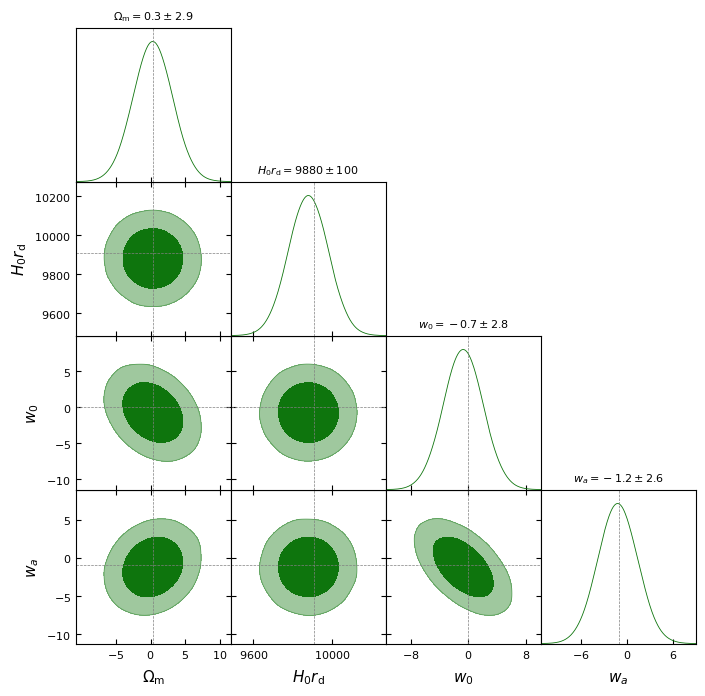

In [8]:
# FIXME : remove w0_fld and wa_fld in this cell
Planck = {
    'Omega_m': Omega_m_Planck,
    'H0_rd': H0_Planck * rd_Planck,
    'w0_fld': 0.0,
    'wa_fld': -1.0,
    # ...
}

plot_triangle(
    chain, 
    params=['Omega_m', 'H0_rd', 'w0_fld', 'wa_fld'],
    markers=Planck, # Add the Planck values as markers lines
    title_limit=1, # To display the mean and std above the histograms
    filled = True, # To fill the contours
    colors = ["#0e750d"], # Set the color
);

You can read the mean and error of the distribution above the histograms, and the contour plot shows the 1-sigma and 2-sigma confidence intervals for the two parameters.

Now, **try to add the $w_0$ and $w_a$ parameters to the plot above** by adding `'w0_fld'` and `'wa_fld'` in the `params` list.

<small> There are also other parameters in the chain that have not been used here. You can try to add them to the plot if you want to. Is the age of the universe consistent with the distances notebook ? and the Planck 2018 measurement ? </small>

In [9]:
print(f'Names of the parameters in the chain : {chain.paramNames.list()}')

Names of the parameters in the chain : ['w0_fld', 'wa_fld', 'H0_rd', 'Omega_m', 'omega_c', 'Omega_Lambda', 'rd', 'age']


You can also try to add the Planck 2018 values to the plot by adding them to the `Planck` dictionary. The values can be found page 16 (Table 2) of the [Planck 2018 paper](https://arxiv.org/abs/1807.06209). For the dark energy equation of state, the values are $w_0 = -1.0$ and $w_a = 0.0$.

Are the Planck values of $w_0$ and $w_a$ consistent with the DESI posteriors ? 

Here is an interpretation of what you should see in the plot:
<details>
  <summary>Spoilers</summary>
  
<img src="../../images/desi_w0wa_annotated.jpg" alt="DESI dark energy annotated contour plot" width="600"/>
<h6> Credit: DESI Collaboration/DOE/KPNO/NOIRLab/NSF/AURA/C. Garcia-Quintero</h6>

</details>

As a last exercise, you can **try to recover the estimate of $H_0$ from the DESI chain.** How does it compare to the Planck 2018 ? 
> *Hint : we have measured the posteriors of $H_0 r_d$ and $r_d$ separately in the chain !*

In [10]:
# H0_rd_mean = ... # Mean of H0_rd
# rd_mean = ... # Mean of rd
# H0_rd_std = ... # Standard deviation of H0_rd
# rd_std = ... # Standard deviation of rd

# H0_estimate = ... # Estimate of H0


# FIXME : soln to be removed
H0_rd_mean = np.mean(chain['H0_rd']) # Mean of H0_rd
rd_mean = np.mean(chain['rd']) # Mean of rd
H0_rd_std = np.std(chain['H0_rd']) # Standard deviation of H0_rd
rd_std = np.std(chain['rd']) # Standard deviation of rd

H0_estimate = H0_rd_mean / rd_mean # Estimate of H0

H0_error = H0_estimate * np.sqrt(
    (H0_rd_std / H0_rd_mean)**2 + (rd_std / rd_mean)**2
) # Error on H0 (from propagation of errors)

print(f"Estimated value of H0: {H0_estimate:.4f} ± {H0_error:.4f} km/s/Mpc")

Estimated value of H0: 67.3592 ± 1.4175 km/s/Mpc


## Conclusion
In this notebook, we have learned about the Monte-Carlo method and how it can be used to estimate the value of a function. We have also learned about the Bayesian approach to cosmological inference and how to use MCMC algorithms to explore the parameter space.

You should now be able to understand the basics of a cosmological inference, how we figure out what are the values of the parameters that descrive our universe, with an evergrowing precision.

![](../../images/footer.png)

<details>
  <summary><h6>Code solutions, do not open if not allowed</h6></summary>
  
**Exercise 1 : Plot the circle**
```python
x_c = np.linspace(0, 1, 100) # Select 100 points between 0 and 1
y_c = np.sqrt(1-x_c**2)
plt.plot(x_c, y_c, color='black')
```

**Exercise 2 : Select a random point in the square**
```python
x = np.random.rand(1000)
y = np.random.rand(1000)

plt.scatter(x, y, color='lightblue')
```

**Exercise 3 : Count the number of points in the circle**
```python
mask = (x**2 + y**2) < 1 # Check if the point is inside the circle
count_inside = np.sum(mask) # Count the number of points inside the circle
```

**Exercise 4 : Plot the points inside the circle in blue and the points outside the circle in red**
```python	
plt.scatter(x, y, c=mask, cmap='coolwarm_r') # Color points based on mask
```

**Exercise 5 : Estimate the value of pi**
```python
N_circle = count_inside # Number of points inside the circle
N_total = len(x) # Total number of points
pi_estimate = 4 * N_circle / N_total # Estimate of pi
```

**Exercise 6 : Absolute difference from pi**
```python
print(np.abs(np.pi - pi_estimate))
```

**Exercise 7 : Choose 10 points, plot the histogram of the points and plot the Gaussian function**
```python
n = 100000 # Number of random points
mu = 0 # Mean of the normal distribution
sigma = 1 # Standard deviation of the normal distribution
x = np.random.normal(mu, sigma, n) # Generate 1000 random numbers from a normal distribution with mu=0 and sigma=1

count, bins, _ = plt.hist(x, histtype='step', bins=100, density=True)
plt.plot(bins, f(bins, mu, sigma), color='black')
```

**Exercise 8 : Find the mean and standard deviation of the posterior**
```python
values = chain['Omega_m']
mu = np.mean(values) # Mean of the values
sigma = np.std(values) # Standard deviation of the values
```

**Exercise 9 : Add $w_0$ and $w_a$ to the triangle plot**
```python
Planck = {
  'Omega_m': Omega_m_Planck, 
  'H0_rd': H0_Planck * rd_Planck, 
  'w0_fld': -1.0, 
  'wa_fld': 0.0,
} # Add Planck values for w0 and wa
[...]
  params = ['Omega_m', 'H0_rd', 'w0_fld', 'wa_fld'] # Add w0 and wa to the list of parameters
```

**Exercise 10 : recover the estimate of $H_0$ from the DESI chain**
```python
H0_rd_mean = np.mean(chain['H0_rd']) # Mean of H0_rd
rd_mean = np.mean(chain['rd']) # Mean of rd
H0_rd_std = np.std(chain['H0_rd']) # Standard deviation of H0_rd
rd_std = np.std(chain['rd']) # Standard deviation of rd

H0_estimate = H0_rd_mean / rd_mean # Estimate of H0
```

  </details>